### INSURANCE CLAIMS DATA = DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Importing data sets
cust_data = pd.read_csv("D:\Data Analyssis\Python\Case studies\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
claims_data = pd.read_csv("D:\Data Analyssis\Python\Case studies\Case Study 3 - Insurance Claims Case Study\claims.csv")

In [3]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [4]:
claims_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
# Renamed some columns name
cust_data = cust_data.rename(columns = {'CUST_ID':'customer_id', 'DateOfBirth':'date_of_birth','State':'state','Contact':'contact','Segment':'segment'})

In [6]:
cust_data.head(2)

,customer_id,gender,date_of_birth,state,contact,segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [7]:
# Merging the datasets based on 'customer_id'
customer_claims = pd.merge(claims_data, cust_data, on='customer_id', how='left')

In [8]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,date_of_birth,state,contact,segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN


In [9]:
customer_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  date_of_birth        1085 non-null   object 
 12  state                1085 non-null   object 
 13  contact              1085 non-null   object 
 14  segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [10]:
# 5-point summary
customer_claims.describe()

,claim_id,customer_id,total_policy_claims
count,1.100000e+03,1.100000e+03,1090.000000
mean,4.883819e+07,5.079954e+07,1.591743
std,2.918806e+07,2.847727e+07,1.147251
min,2.683200e+04,1.545570e+05,1.000000
25%,2.381580e+07,2.647951e+07,1.000000
50%,4.853933e+07,4.979007e+07,1.000000
75%,7.407447e+07,7.601978e+07,2.000000
max,9.977548e+07,9.996199e+07,8.000000


In [11]:
# 5-point summary
customer_claims.describe(include='all')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,date_of_birth,state,contact,segment
count,1.100000e+03,1.100000e+03,1100,1100,1100,1100,1100,1035,1090.000000,1100,1085,1085,1085,1085,1085
unique,NaN,NaN,5,100,2,3,3,683,NaN,2,2,1078,50,1078,3
top,NaN,NaN,Other causes,04/04/2018,Auto,No,Material only,$2090,NaN,No,Male,18-Oct-72,NY,743-569-4783,Gold
freq,NaN,NaN,290,18,985,630,663,7,NaN,846,556,2,31,2,375
mean,4.883819e+07,5.079954e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.591743,NaN,NaN,NaN,NaN,NaN,NaN
std,2.918806e+07,2.847727e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.147251,NaN,NaN,NaN,NaN,NaN,NaN
min,2.683200e+04,1.545570e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.381580e+07,2.647951e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.853933e+07,4.979007e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.407447e+07,7.601978e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checking for duplicates
customer_claims.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1095    False
1096    False
1097    False
1098    False
1099    False
Length: 1100, dtype: bool

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [13]:
customer_claims.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
date_of_birth           object
state                   object
contact                 object
segment                 object
dtype: object

In [14]:
# Convert 'claim_date' to datetime
customer_claims['claim_date'] = pd.to_datetime(customer_claims['claim_date'])

In [15]:
customer_claims['date_of_birth'] = pd.to_datetime(customer_claims['date_of_birth'])

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [16]:
# converting claim_amount column into numeric/float
customer_claims['claim_amount'] = customer_claims['claim_amount'].str.slice(start=1).astype(np.float64)

In [17]:
customer_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
date_of_birth          datetime64[ns]
state                          object
contact                        object
segment                        object
dtype: object

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [18]:
# an alert flag for unreported injury claims
customer_claims['alert_flag'] = ((customer_claims['claim_type'] == 'Material and injury') | (customer_claims['claim_type'] == 'Injury only')) & (customer_claims['police_report'] == 'No')
customer_claims['alert_flag'] = customer_claims['alert_flag'].astype(int)

In [19]:
# Display the updated DataFrame with the new 'alert_flag' column
(customer_claims[['claim_type', 'police_report', 'alert_flag']])

,claim_type,police_report,alert_flag
0,Material only,No,0
1,Material only,Unknown,0
2,Material only,No,0
3,Material only,No,0
4,Material only,No,0
...,...,...,...
1095,Material only,No,0
1096,Material only,No,0
1097,Material and injury,No,1
1098,Material and injury,Unknown,0


In [20]:
(customer_claims[['claim_type', 'police_report', 'alert_flag']]).head(6)

,claim_type,police_report,alert_flag
0,Material only,No,0
1,Material only,Unknown,0
2,Material only,No,0
3,Material only,No,0
4,Material only,No,0
5,Injury only,No,1


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [21]:
# Sort by 'customer_id' and 'claim_date'
customer_claims = customer_claims.sort_values(['customer_id', 'claim_date'])

# Drop duplicates
customer_claims = customer_claims.drop_duplicates('customer_id', keep='last')

In [22]:
customer_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,date_of_birth,state,contact,segment,alert_flag
184,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,2072-12-20,TX,173-892-6314,Silver,1
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,2071-08-19,CA,187-348-8375,Gold,0
505,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,2065-01-28,UT,517-562-4916,Silver,1
999,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,2066-06-19,HI,457-752-1374,Gold,0
68,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,2063-11-18,NC,643-246-4718,Silver,0
936,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
customer_claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
date_of_birth          15
state                  15
contact                15
segment                15
alert_flag              0
dtype: int64

In [24]:
# Imputing missing values for continuous columns (numeric)
numeric_columns = customer_claims.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    if customer_claims[column].isnull().any():
        customer_claims[column].fillna(customer_claims[column].mean(), inplace=True)

# Imputing missing values for categorical columns (object)
categorical_columns = customer_claims.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if customer_claims[column].isnull().any():
        mode_val = customer_claims[column].mode()[0]
        customer_claims[column].fillna(mode_val, inplace=True)

In [25]:
customer_claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
gender                  0
date_of_birth          15
state                   0
contact                 0
segment                 0
alert_flag              0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria:  Children < 18 ;  Youth 18-30 ;  Adult 30-60 ;  Senior > 60

In [26]:
# Calculate the age of customers
customer_claims['age'] = (dt.datetime.now() - customer_claims['date_of_birth']).dt.days // 365

# Categorize customers based on their age
customer_claims['age_category'] = pd.cut(customer_claims['age'], bins=[0, 18, 30, 60, np.inf], labels=['Children', 'Youth', 'Adult', 'Senior'])

In [27]:
customer_claims[['date_of_birth', 'age', 'age_category']]

,date_of_birth,age,age_category
184,1978-05-23,45.0,Adult
836,2072-12-20,-50.0,NaN
677,1988-07-28,35.0,Adult
828,2071-08-19,-48.0,NaN
505,1980-08-10,43.0,Adult
...,...,...,...
698,2065-01-28,-42.0,NaN
999,2066-06-19,-43.0,NaN
68,2063-11-18,-40.0,NaN
936,1995-06-08,28.0,Youth


### 8. What is the average amount claimed by the customers from various segments?

In [28]:
# Calculate the average claim amount by segment
average_claim_by_segment = customer_claims.groupby('segment')['claim_amount'].mean()

# Print the result
print(average_claim_by_segment)

segment
Gold        12761.663185
Platinum    12370.565077
Silver      12265.736955
Name: claim_amount, dtype: float64


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [29]:
# Define the cutoff date
cutoff_date = dt.datetime.strptime('2018-10-01', '%Y-%m-%d') - pd.DateOffset(days=20)

# Filter the data for claims done at least 20 days prior to 1st of October, 2018
filtered_data = customer_claims[customer_claims['claim_date'] < cutoff_date]

# Calculate the total claim amount by incident cause
total_claim_by_cause = filtered_data.groupby('incident_cause')['claim_amount'].sum()
total_claim_by_cause = total_claim_by_cause.round(1)
# Print the result
print(total_claim_by_cause)

incident_cause
Crime                  726959.5
Driver error          3344546.0
Natural causes        1315301.0
Other causes          3778023.5
Other driver error    3342803.0
Name: claim_amount, dtype: float64


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [30]:
# Filter the data and calculate the number of adults
num_adults = len(customer_claims[(customer_claims['age_category'] == 'Adult') &
                                 (customer_claims['state'].isin(['TX', 'DE', 'AK'])) &
                                 (customer_claims['incident_cause'].isin(['Driver error', 'Other driver error']))])
print(num_adults)

20


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

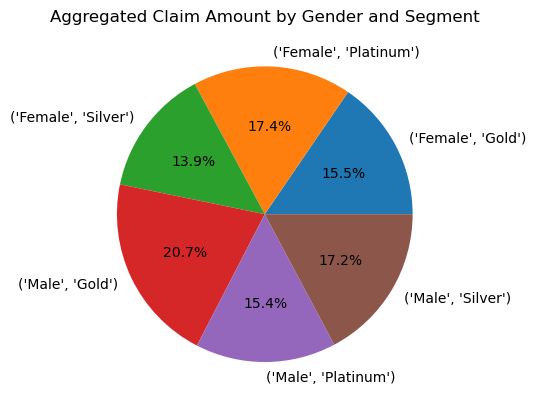

In [31]:
# Calculate the aggregated value of claim amount based on gender and segment
agg = customer_claims.groupby(['gender', 'segment'])['claim_amount'].sum()

# a pie chart
fig, ax = plt.subplots()
ax.pie(agg, labels=agg.index, autopct='%1.1f%%')
plt.title('Aggregated Claim Amount by Gender and Segment')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

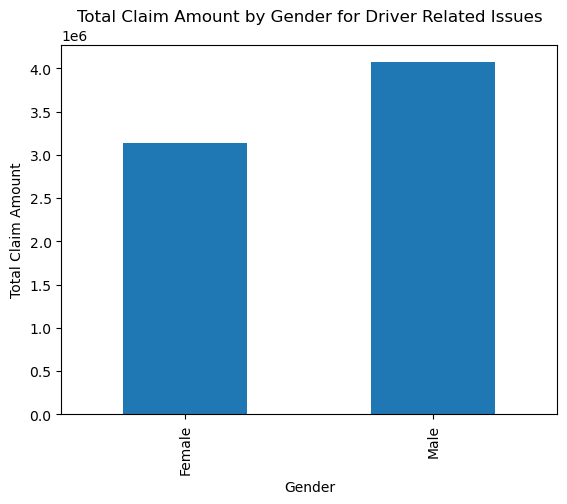

In [32]:
total_claim_by_gender = customer_claims[customer_claims['incident_cause'].isin(['Driver error', 'Other driver error'])].groupby('gender')['claim_amount'].sum()
# Create a bar chart
total_claim_by_gender.plot(kind='bar')
plt.title('Total Claim Amount by Gender for Driver Related Issues')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [33]:
# Filter the data for fraudulent policy claims
fraudulent_claims = customer_claims[customer_claims['fraudulent'] == 'Yes']  

# Calculate the number of fraudulent claims for each age group
fraudulent_claims_by_age_group = fraudulent_claims['age_category'].value_counts()
fraudulent_claims_by_age_group

Adult       119
Youth        39
Children      0
Senior        0
Name: age_category, dtype: int64

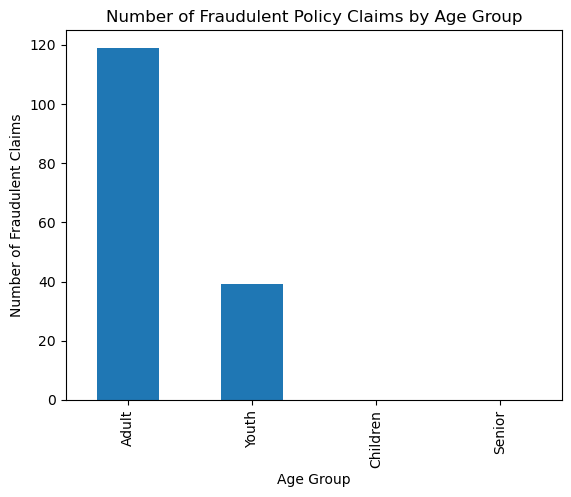

In [34]:
# Create a bar chart
fraudulent_claims_by_age_group.plot(kind='bar')
plt.title('Number of Fraudulent Policy Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [35]:
# Extract the month and year from 'claim_date'
customer_claims['claim_month_year'] = customer_claims['claim_date'].dt.to_period('M')

# Calculate the total claim amount for each month
total_claim_by_month = customer_claims.groupby('claim_month_year')['claim_amount'].sum()


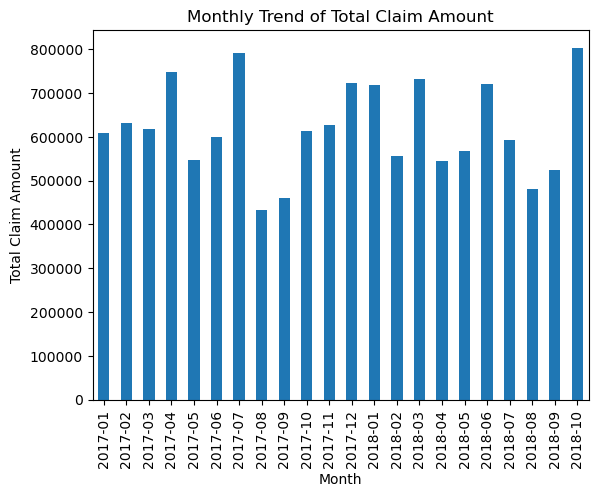

In [36]:
# Create a bar chart
total_claim_by_month.plot(kind='bar')
plt.title('Monthly Trend of Total Claim Amount')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [37]:
# Filter data for fraudulent and non-fraudulent claims separately
fraudulent_data = customer_claims[customer_claims['fraudulent'] == 'Yes']
non_fraudulent_data = customer_claims[customer_claims['fraudulent'] == 'No']

# Calculate average claim amount for gender and age categories
average_claim_fraudulent = fraudulent_data.groupby(['gender', 'age_category'])['claim_amount'].mean().reset_index()
average_claim_non_fraudulent = non_fraudulent_data.groupby(['gender', 'age_category'])['claim_amount'].mean().reset_index()

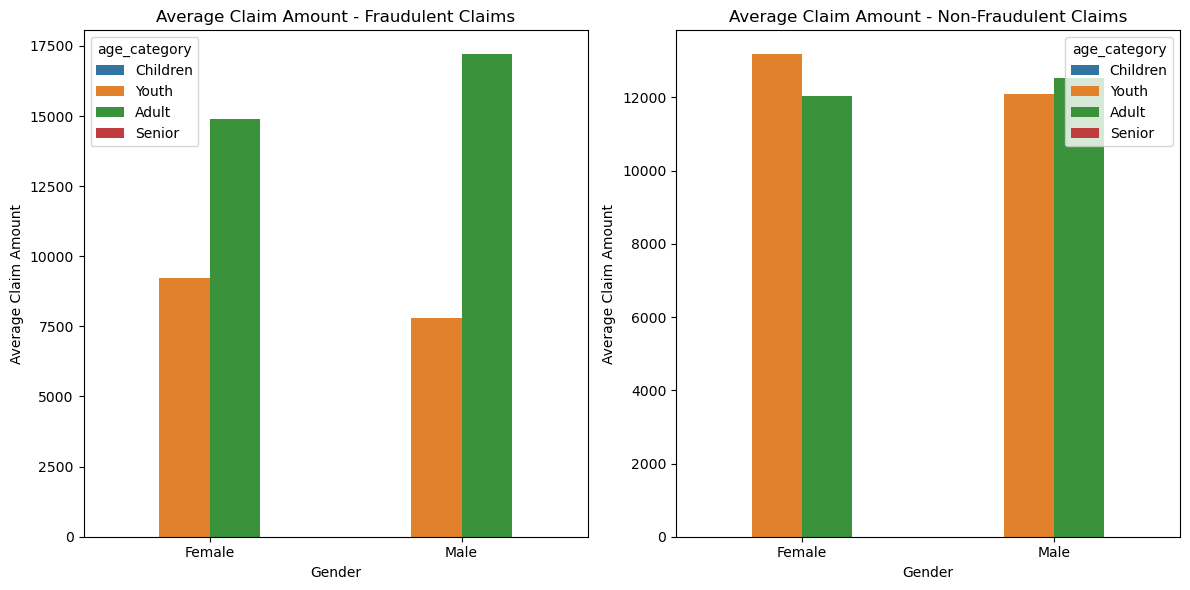

In [38]:
# Plot facetted bar charts for fraudulent and non-fraudulent claims
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='claim_amount', hue='age_category', data=average_claim_fraudulent)
plt.title('Average Claim Amount - Fraudulent Claims')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')

plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='claim_amount', hue='age_category', data=average_claim_non_fraudulent)
plt.title('Average Claim Amount - Non-Fraudulent Claims')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')

plt.tight_layout()
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [39]:
# average amount claimed by male and female

male_spend=customer_claims['claim_amount'].loc[customer_claims.gender=='Male']
female_spend=customer_claims['claim_amount'].loc[customer_claims.gender=='Female']
print( 'mean male spend: ', male_spend.mean(), '| mean female spend: ', female_spend.mean(), '\n' )

mean male spend:  12825.38866164359 | mean female spend:  12099.717240787364 



In [40]:
from scipy.stats import stats

# Filter the data for males and females
males = customer_claims[customer_claims['gender'] == 'Male']['claim_amount']
females = customer_claims[customer_claims['gender'] == 'Female']['claim_amount']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(males, females)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 0.897746972800219
P-value: 0.3695185282320991


In [41]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the amount claimed between males and females.")
else:
    print("There is no significant difference in the amount claimed between males and females.")

There is no significant difference in the amount claimed between males and females.


### 17. Is there any relationship between age category and segment?

In [42]:
import scipy.stats as stats
# Create a cross-tabulation table
table = pd.crosstab(customer_claims['age_category'], customer_claims['segment'])

# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 0.27550010606271463
P-value: 0.8713164474357424


In [43]:
# Interpret p-value 
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between age category and segment.")
else:
    print("There is no significant relationship between age category and segment.")

There is no significant relationship between age category and segment.


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [44]:
# Assume 'current_year = 2018
current_year_claims = customer_claims[customer_claims['claim_date'].dt.year == 2018]['claim_amount']

t_statistic, p_value = stats.ttest_1samp(current_year_claims, 10000)        # Perform t-test

print(f'T-statistic: {t_statistic}')             
print(f'P-value: {p_value}')

T-statistic: 4.4147704931665
P-value: 1.2444078618606088e-05


In [45]:
alpha = 0.05
if p_value < alpha:
    print("The current year has shown a significant rise in claim amounts.")
else:
    print("The current year has not shown a significant rise in claim amounts.")

The current year has shown a significant rise in claim amounts.


### 19. Is there any difference between age groups and insurance claims?

In [46]:
# insurance claims means in term of claim_amount or total_policy_claim is not mentioned
# Assumed total_policy_claim

In [47]:
age_group_1 = customer_claims['total_policy_claims'].loc[customer_claims['age_category']=="Youth"]
age_group_2 = customer_claims['total_policy_claims'].loc[customer_claims['age_category']=="Adult"]

# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)

# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))

if(p<0.05):
    print('There is significant difference in insurance claims across age categories.')
else:
    print('There is no significant difference in insurance claims across age categories.')

The f-value is 1.1865420221957397 and the p value is 0.2763906167958276
There is no significant difference in insurance claims across age categories.


### Q. 19 Another Way - by claim_amount and age_category

In [48]:
customer_claims.groupby('age_category')['claim_amount'].sum()

age_category
Children    0.000000e+00
Youth       2.464623e+06
Adult       6.811855e+06
Senior      0.000000e+00
Name: claim_amount, dtype: float64

In [49]:
age_cat1=customer_claims['claim_amount'].loc[customer_claims.age_category=='Youth']
age_cat2=customer_claims['claim_amount'].loc[customer_claims.age_category=='Adult']
print('the mean of Youth claimed amount :',age_cat1.mean() ,'|the mean of Adult claimed amount :',age_cat2.mean())

the mean of Youth claimed amount : 11849.14900104759 |the mean of Adult claimed amount : 13150.299198691466


In [50]:
stats.ttest_ind(age_cat1,age_cat2)

Ttest_indResult(statistic=-1.1818074441734296, pvalue=0.23767013161982808)

In [51]:
if(p<0.05):
    print('There is significant difference in insurance claims across age categories.')
else:
    print('There is no significant difference in insurance claims across age categories.')

There is no significant difference in insurance claims across age categories.


Conclusion
Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age_categories and insurance claims or No influence of age_category on insurance claims.

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [52]:
# 'total_policy_claims' and 'claim_amount' 
correlation_coefficient, p_value = stats.pearsonr(customer_claims['total_policy_claims'], customer_claims['claim_amount'])

print(f'Correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Correlation coefficient: -0.023908971978697457
P-value: 0.42973091875407876


In [53]:
if correlation_coefficient > 0:
        print("There is a significant positive relationship between the total number of policy claims and the claimed amount.")
elif correlation_coefficient < 0:
        print("There is a significant negative relationship between the total number of policy claims and the claimed amount.")
else:
        print("There is no significant relationship between the total number of policy claims and the claimed amount.")

There is a significant negative relationship between the total number of policy claims and the claimed amount.


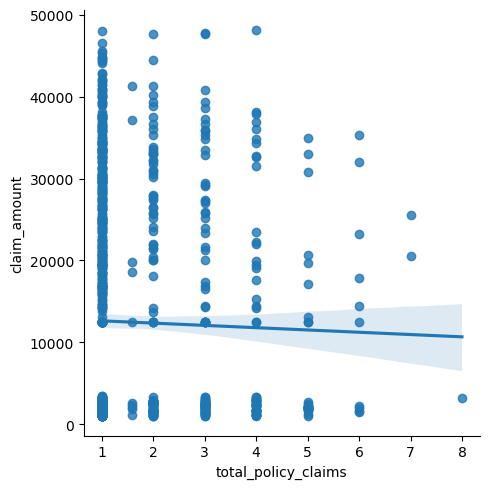

In [54]:
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = customer_claims)